In [ ]:
%load_ext autoreload
%autoreload 2

from data_prep import DataPreparation, filtering_data
from lstm import LSTMModelTrainerAttention, LSTMRollingForecaster
from rf import RandomForestTrainer
from lgbm import LightGBMTrainer
from catboost_trainer import CatBoostTrainer
from transformer import TransformerTrainer
import os
import dill as pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings("ignore", category=UserWarning)


c:\Users\iLabs_6\anaconda3\envs\texml\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
output= r'C:\Users\iLabs_6\Documents\Tex\realtimetest'
modelname = 'extended_ATOT_RT'

 
with  open(os.path.join(output, modelname), 'rb') as f:  
    extended_df = pickle.load(f)

extended_df['cap_DEP'].fillna(extended_df['cap_DEP'].mean(), inplace=True)
extended_df['cap_DES'].fillna(extended_df['cap_DES'].mean(), inplace=True)
extended_df = extended_df.loc[:, ~extended_df.columns.str.contains('t_to_eobt', case=False)]
extended_df = extended_df.loc[:, ~extended_df.columns.str.contains('t_to_atot', case=False)]

pd.set_option("display.max_columns", None)
X, y, colnames = filtering_data(extended_df, airport ='EHAM', save=True)
X = X.drop(['ADES_EHAM', 'ADESLong', 'ADESLat', 'cbasentry'], axis =1)
X.describe()

output= r'C:\Users\iLabs_6\Documents\Tex\realtimetest'
modelname = 'extended_ETOT_RT'


with  open(os.path.join(output, modelname), 'rb') as f:  
    extended_real= pickle.load(f)
extended_real = extended_real.loc[:, ~extended_real.columns.str.contains('t_to_eobt', case=False)]
extended_real = extended_real.loc[:, ~extended_real.columns.str.contains('t_to_atot', case=False)]

pd.set_option("display.max_columns", None)
print(f'{extended_real}')
X_r, y_r, colnames = filtering_data(extended_real, airport ='EHAM', save=False)
X_r = X_r.drop(['ADES_EHAM', 'ADESLong', 'ADESLat', 'cbasentry'], axis =1)
# X.fillna(0, inplace=True)
print(f'xxxxx = {X_r}')

           distance                ETOT  ADEP  ADES                EOBT  \
0       1992.934496 2024-03-01 08:43:00  LFLL  EHAM 2024-03-01 08:35:00   
1       1992.934496 2024-03-01 08:43:00  LFLL  EHAM 2024-03-01 08:35:00   
2       1992.934496 2024-03-01 08:43:00  LFLL  EHAM 2024-03-01 08:35:00   
3       1992.934496 2024-03-01 08:43:00  LFLL  EHAM 2024-03-01 08:35:00   
4       1992.934496 2024-03-01 14:03:00  LFLL  EHAM 2024-03-01 13:55:00   
...             ...                 ...   ...   ...                 ...   
26679  15512.634974 2024-03-25 17:35:00  LFPG  EHAM 2024-03-25 17:15:00   
26680  14437.477905 2024-03-25 20:00:00  LSZH  EHAM 2024-03-25 19:45:00   
26681  14437.477905 2024-03-25 20:00:00  LSZH  EHAM 2024-03-25 19:45:00   
26682  14437.477905 2024-03-25 20:00:00  LSZH  EHAM 2024-03-25 19:45:00   
26683  14437.477905 2024-03-25 20:00:00  LSZH  EHAM 2024-03-25 19:45:00   

                      ETA    CDMStatus  taxitime event  regulations  \
0     2024-03-01 09:48:00  D

In [12]:
data_prep = DataPreparation()


X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, time_horizons, cbaslabels = data_prep.fit_transform_data(X, y)
X_real, ETOT_horizons, cbaslabels = data_prep.transform_data(X_r)

X_train, X_test, y_train, y_test = data_prep.fit_transform_data(X, y, split_ratio=0.8, mode='rf')
print(f'{X_train_tensor.shape=}')
print(f'{X_test_tensor.shape=}')

skip=['CBAS', 'cbas', 'eobt', 'atot', 'wspeed', 'wdirec', 'wguts']
time_varying_columns=['atfmdelay_Tmin_-300', 'regulations_Tmin_-300', 'cobt_delay_Tmin_-300', 'eflighttime_Tmin_-300', 'visibility_Tmin_-300', 'ko_Tmin_-300', 'TSATdelay_Tmin_-300', 'TOBTdelay_Tmin_-300', 'etodepdelay_Tmin_-300', 'timetoCBAS_Tmin_-300', 'offblock_Tmin_-300', 'fltstate_SI_Tmin_-300', 'fltstate_FI_Tmin_-300', 'fltstate_other_Tmin_-300', 'modeltyp_ACT_Tmin_-300', 'modeltyp_CAL_Tmin_-300', 'modeltyp_EST_Tmin_-300', 'atfmdelay_Tmin_-295', 'regulations_Tmin_-295', 'cobt_delay_Tmin_-295', 'eflighttime_Tmin_-295', 'visibility_Tmin_-295', 'ko_Tmin_-295', 'TSATdelay_Tmin_-295', 'TOBTdelay_Tmin_-295', 'etodepdelay_Tmin_-295', 'timetoCBAS_Tmin_-295', 'offblock_Tmin_-295', 'fltstate_SI_Tmin_-295', 'fltstate_FI_Tmin_-295', 'fltstate_other_Tmin_-295', 'modeltyp_ACT_Tmin_-295', 'modeltyp_CAL_Tmin_-295', 'modeltyp_EST_Tmin_-295', 'atfmdelay_Tmin_-290', 'regulations_Tmin_-290', 'cobt_delay_Tmin_-290', 'eflighttime_Tmin_-

X_train_tensor.shape=torch.Size([70142, 61, 79])
X_test_tensor.shape=torch.Size([17536, 61, 79])
device = cuda
params = (79, 100, 1, 5, 0.0005, 40, 1, 5, 0.3)
Start training with model varattention
Epoch 1: Current max_shift = 2
Epoch [1/40], Train Loss: 0.4496, Val Loss: 0.4565
Epoch 2: Current max_shift = 2
Epoch [2/40], Train Loss: 0.3625, Val Loss: 0.3706
Epoch 3: Current max_shift = 2
Epoch [3/40], Train Loss: 0.3088, Val Loss: 0.3557
Epoch 4: Current max_shift = 2
Epoch [4/40], Train Loss: 0.2897, Val Loss: 0.3392
Epoch 5: Current max_shift = 2
Epoch [5/40], Train Loss: 0.2791, Val Loss: 0.3284
Epoch 6: Current max_shift = 2
Epoch [6/40], Train Loss: 0.2712, Val Loss: 0.3243
Epoch 7: Current max_shift = 2
Epoch [7/40], Train Loss: 0.2656, Val Loss: 0.3209
Epoch 8: Current max_shift = 2
Epoch [8/40], Train Loss: 0.2604, Val Loss: 0.3134
Epoch 9: Current max_shift = 2
Epoch [9/40], Train Loss: 0.2561, Val Loss: 0.3192
Epoch 10: Current max_shift = 2
Epoch [10/40], Train Loss: 0.252

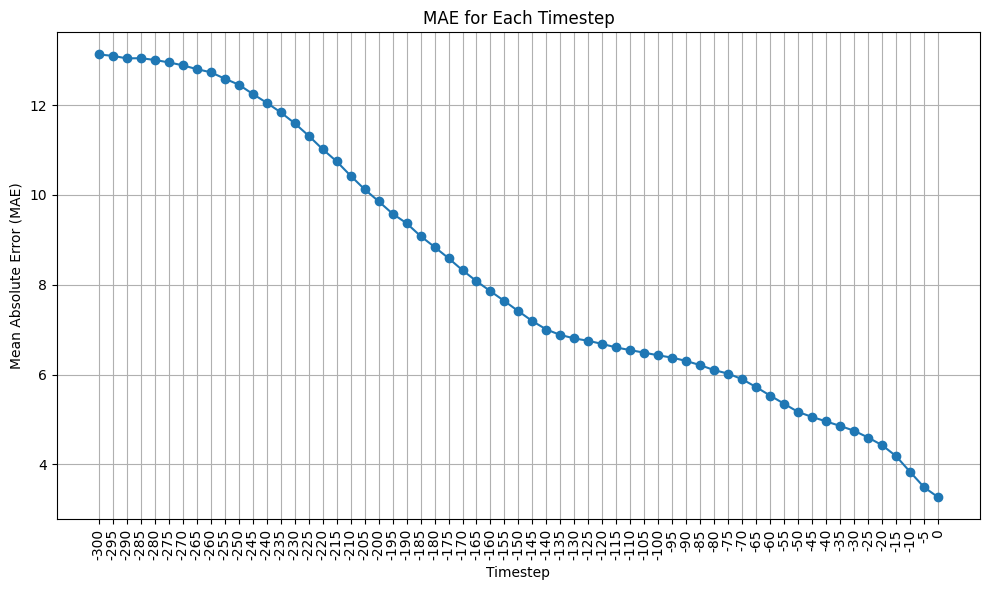

In [13]:
model_trainer = LSTMModelTrainerAttention(data_prep=data_prep, input_size=data_prep.input_size, model_type='varattention')
print(f'{X_train_tensor.shape=}')
print(f'{X_test_tensor.shape=}')
# Set data loaders
model_trainer.set_data_loaders(data_prep.train_loader, data_prep.test_loader, data_prep.time_steps)

# ANDERE SWITCH, afhankelijk van eerste prediction
best_model = model_trainer.hyperparameter_search(1)
#2707 16 it
# Evaluate the best model and plot the results
y_pred, y_test = model_trainer.evaluate_and_plot(best_model, X_test_tensor, y_test_tensor, data_prep.scaler_y, time_horizons)

#2536

In [16]:
output= r"C:\Users\iLabs_6\Documents\Tex\AirTrafficDelays\LSTM_Models"

modelname = 'lstm-9-100-2shift-3046-goodval'
with open(os.path.join(output, modelname), 'wb') as f:  
    pickle.dump(best_model, f, protocol=pickle.HIGHEST_PROTOCOL)
    print(f"FlightDataset has been saved successfully. {modelname}")

with  open(os.path.join(output, modelname), 'rb') as f:  
    best_model = pickle.load(f)


FlightDataset has been saved successfully. lstm-9-100-2shift-3046-goodval


In [15]:
from tqdm import tqdm
from lstm import LSTMRollingForecaster
from collections import defaultdict
import matplotlib.pyplot as plt
# Initialize variables
ap = []
target_length = 61  # Target length for each error array
start_idx, end_idx = -1000, -100  # Define your index range as variables5
# start_idx, end_idx = 16000, 16500  # Define your index range as variables

# Debug: Print initial data for checking
# print(f'Non-zero indices in y_r: {np.where(y_r == 1)[0]}')
# print(f'ETOT_horizons: {ETOT_horizons}')
error_dict = {}

# Loop through the specified range in `y_r`
for fnr in tqdm(np.where((y_r <= 120))[0]):
    # Create rolling forecaster instance
    # print(f'{fnr=}')
    recursive = LSTMRollingForecaster(best_model, data_prep, X_real[fnr], ETOT_horizons)
    pred = recursive.rolling_forecast()
    # print(f'{pred=}')
    # Calculate absolute error per timestep
    absolute_error_per_timestep = np.abs(pred[-target_length:] - y_r[fnr])[::-1]
    
    clabel = [x.astype('timedelta64[s]').astype(int) / 60 for x in cbaslabels[fnr] if not np.isnat(x)][-target_length:][::-1]
    # print(f'{len(clabel)=} {clabel}')
    # print(f'{len(absolute_error_per_timestep)=} {absolute_error_per_timestep}')
    if len(absolute_error_per_timestep) > len(clabel):
        # print(f'{fnr=} {len(absolute_error_per_timestep)=} { len(clabel)=}')
        absolute_error_per_timestep = absolute_error_per_timestep[-len(clabel):]
        # continue
    # Loop over the filtered `clabel` and `absolute_error_per_timestep`
    for i in range(len(absolute_error_per_timestep)):
        time_to_cbas = np.round(clabel[i],0)
        if time_to_cbas not in error_dict:
            
            error_dict[time_to_cbas] = []
        error_dict[time_to_cbas].append(absolute_error_per_timestep[i])
        # print(f'{error_dict=}')
    # break

bucketed_errors = defaultdict(list)
for time_in_seconds, errors in error_dict.items():
    time_in_minutes = time_in_seconds   # Convert seconds to minutes
    bucket = int(time_in_minutes // 5) * 5   # Group into 5-minute buckets
    bucketed_errors[bucket].extend(errors)   # Aggregate errors within the bucket

# Compute the mean error for each bucket
mean_errors_by_bucket = {bucket: np.nanmean(errors) for bucket, errors in bucketed_errors.items()}

# Sort the buckets
sorted_buckets = sorted(mean_errors_by_bucket.items())
print(f'{bucketed_errors=}')
# Extract sorted times and mean errors for plotting
times = [item[0] for item in sorted_buckets]
errors = [item[1] for item in sorted_buckets]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(times[:-10], errors[:-10], marker='o', linestyle='-')
plt.title("Mean Prediction Error vs Time to CBAS Entry (bucketed in 5-minute intervals)")
plt.xlabel("Time to CBAS Entry (minutes)")
plt.ylabel("Mean Prediction Error (minutes)")
plt.grid(True)
plt.show()


# Calculate mean absolute error (MAE) per timestep, ignoring NaNs in the calculation

  0%|          | 32/26632 [00:12<2:55:31,  2.53it/s]


KeyboardInterrupt: 

In [39]:
# Initialize RandomForestTrainer with desired hyperparameters
trainer_rf = RandomForestTrainer(dataprep=data_prep,n_estimators=20, max_depth=10, min_samples_split=5, horizons=data_prep.time_horizons)

# # Share the scaler_y between data_prep_rf and trainer_rf
trainer_rf.scaler_y = data_prep.scaler_y

# # Train the model
# trainer_rf.train(X_train, y_train)

time_varying_columns=['atfmdelay_Tmin_-300', 'regulations_Tmin_-300', 'cobt_delay_Tmin_-300', 'eflighttime_Tmin_-300', 'visibility_Tmin_-300', 'ko_Tmin_-300', 'TSATdelay_Tmin_-300', 'TOBTdelay_Tmin_-300', 'etodepdelay_Tmin_-300', 'timetoCBAS_Tmin_-300', 'offblock_Tmin_-300', 'fltstate_SI_Tmin_-300', 'fltstate_FI_Tmin_-300', 'fltstate_other_Tmin_-300', 'modeltyp_ACT_Tmin_-300', 'modeltyp_CAL_Tmin_-300', 'modeltyp_EST_Tmin_-300', 'atfmdelay_Tmin_-295', 'regulations_Tmin_-295', 'cobt_delay_Tmin_-295', 'eflighttime_Tmin_-295', 'visibility_Tmin_-295', 'ko_Tmin_-295', 'TSATdelay_Tmin_-295', 'TOBTdelay_Tmin_-295', 'etodepdelay_Tmin_-295', 'timetoCBAS_Tmin_-295', 'offblock_Tmin_-295', 'fltstate_SI_Tmin_-295', 'fltstate_FI_Tmin_-295', 'fltstate_other_Tmin_-295', 'modeltyp_ACT_Tmin_-295', 'modeltyp_CAL_Tmin_-295', 'modeltyp_EST_Tmin_-295', 'atfmdelay_Tmin_-290', 'regulations_Tmin_-290', 'cobt_delay_Tmin_-290', 'eflighttime_Tmin_-290', 'visibility_Tmin_-290', 'ko_Tmin_-290', 'TSATdelay_Tmin_-290'

In [40]:
trainer_rf.evaluate(X_test, y_test)

KeyboardInterrupt: 

In [33]:
trainer_gbm = LightGBMTrainer(dataprep=data_prep,n_estimators=20, max_depth=10, min_samples_split=5, horizons=data_prep.time_horizons)

# Share the scaler_y between data_prep_rf and trainer_rf
trainer_gbm.scaler_y = data_prep.scaler_y

# Train the model
# trainer_gbm.train(X_train, y_train)

Created model directory at: lgbm_models


Loaded model for Timestep -300 from lgbm_models\lgbm_-300.pkl
Loaded model for Timestep -295 from lgbm_models\lgbm_-295.pkl
Loaded model for Timestep -290 from lgbm_models\lgbm_-290.pkl
Loaded model for Timestep -285 from lgbm_models\lgbm_-285.pkl
Loaded model for Timestep -280 from lgbm_models\lgbm_-280.pkl
Loaded model for Timestep -275 from lgbm_models\lgbm_-275.pkl
Loaded model for Timestep -270 from lgbm_models\lgbm_-270.pkl
Loaded model for Timestep -265 from lgbm_models\lgbm_-265.pkl
Loaded model for Timestep -260 from lgbm_models\lgbm_-260.pkl
Loaded model for Timestep -255 from lgbm_models\lgbm_-255.pkl
Loaded model for Timestep -250 from lgbm_models\lgbm_-250.pkl
Loaded model for Timestep -245 from lgbm_models\lgbm_-245.pkl
Loaded model for Timestep -240 from lgbm_models\lgbm_-240.pkl
Loaded model for Timestep -235 from lgbm_models\lgbm_-235.pkl
Loaded model for Timestep -230 from lgbm_models\lgbm_-230.pkl
Loaded model for Timestep -225 from lgbm_models\lgbm_-225.pkl
Loaded m

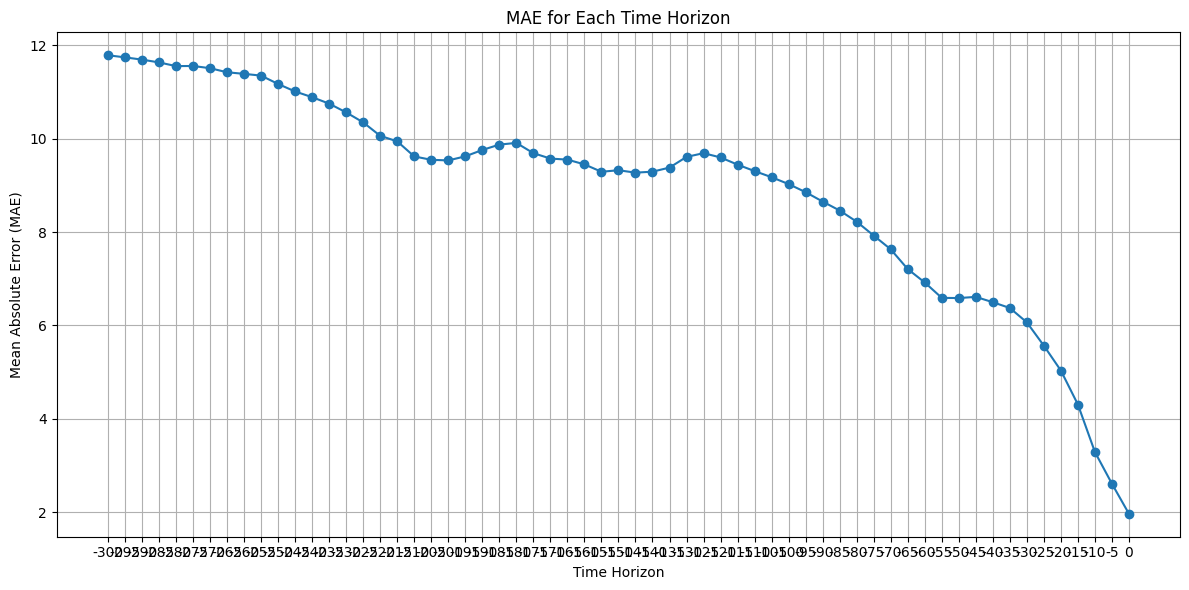

[11.786294044536493,
 11.741367128369399,
 11.692795688201802,
 11.633181594483837,
 11.554130472238603,
 11.556592261553641,
 11.509164299797954,
 11.421962383498519,
 11.38790789501304,
 11.350131239255559,
 11.170863591649196,
 11.010239393714656,
 10.888141374998817,
 10.74966142760099,
 10.562031667964582,
 10.34846013166069,
 10.059977073452217,
 9.941965589724486,
 9.619021369848998,
 9.54667434854921,
 9.53372795301618,
 9.62102812777668,
 9.757362948315357,
 9.87242831097382,
 9.908831440057336,
 9.688936572510881,
 9.57330247890661,
 9.550560726297492,
 9.449152841087685,
 9.290567807415098,
 9.323402291342264,
 9.27175928390523,
 9.292337483782248,
 9.380136648272059,
 9.608932025144773,
 9.688887652531138,
 9.597413216756163,
 9.443200399103977,
 9.305190720547069,
 9.173883909356082,
 9.026554342992196,
 8.85345633319202,
 8.65248550386362,
 8.460195173887218,
 8.221084790418127,
 7.923982378185983,
 7.629400391055539,
 7.2059979832593735,
 6.919146764254058,
 6.5892934917

In [35]:
trainer_gbm.evaluate(X_test, y_test)

In [37]:
trainer_cat = CatBoostTrainer(dataprep=data_prep, horizons=data_prep.time_horizons)

# Share the scaler_y between data_prep_rf and trainer_rf
trainer_cat.scaler_y = data_prep.scaler_y

# Train the model
# trainer_cat.train(X_train, y_train)

Model directory already exists at: catboost_models


Loaded model for Timestep -300 from catboost_models\catboost_-300.pkl
Loaded model for Timestep -295 from catboost_models\catboost_-295.pkl
Loaded model for Timestep -290 from catboost_models\catboost_-290.pkl
Loaded model for Timestep -285 from catboost_models\catboost_-285.pkl
Loaded model for Timestep -280 from catboost_models\catboost_-280.pkl
Loaded model for Timestep -275 from catboost_models\catboost_-275.pkl
Loaded model for Timestep -270 from catboost_models\catboost_-270.pkl
Loaded model for Timestep -265 from catboost_models\catboost_-265.pkl
Loaded model for Timestep -260 from catboost_models\catboost_-260.pkl
Loaded model for Timestep -255 from catboost_models\catboost_-255.pkl
Loaded model for Timestep -250 from catboost_models\catboost_-250.pkl
Loaded model for Timestep -245 from catboost_models\catboost_-245.pkl
Loaded model for Timestep -240 from catboost_models\catboost_-240.pkl
Loaded model for Timestep -235 from catboost_models\catboost_-235.pkl
Loaded model for Tim

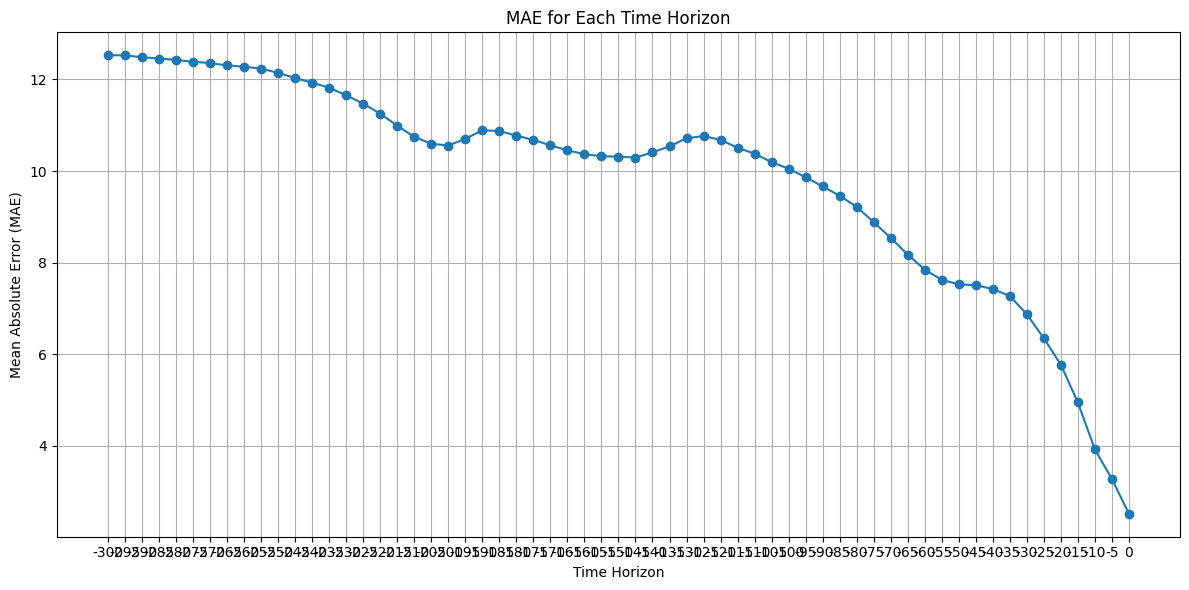

[12.528761491717882,
 12.52704123253812,
 12.485254169013496,
 12.457222695756794,
 12.426888719149186,
 12.387403312837861,
 12.358205376670208,
 12.306657214836433,
 12.279813001485621,
 12.236684270354337,
 12.144186769618456,
 12.030633646244448,
 11.930892912036251,
 11.819782157078256,
 11.654865288786334,
 11.472780534385535,
 11.251733417093702,
 10.990335360970256,
 10.7459628752551,
 10.596474926143916,
 10.55750920095829,
 10.702831902008642,
 10.889916524197774,
 10.873347907106345,
 10.774636839424167,
 10.680114697358066,
 10.562516603754753,
 10.452334124205883,
 10.369087394907812,
 10.323228165236994,
 10.314376297267376,
 10.29251184018139,
 10.407865620044547,
 10.539619502020265,
 10.714188221695188,
 10.764599610159776,
 10.679658479789628,
 10.508692982130928,
 10.378927981843741,
 10.194930918934661,
 10.051083145686016,
 9.863460529263666,
 9.665388489697166,
 9.459341754086212,
 9.218166125046004,
 8.88218633218284,
 8.540313938436602,
 8.17442877184843,
 7.844

In [38]:
trainer_cat.evaluate(X_test, y_test)